### Andrew Evans (ace8p)
DS6003
Assignment 1 - Spark

## Load Dependencies

In [42]:
import pyspark
from os import listdir
from os.path import isfile, join
import boto3
import pandas as pd
from sagemaker import get_execution_role
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType

## Initialize the spark environment

In [2]:
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)
sc

<SparkContext master=local appName=odl>

## Make a data frame

In [3]:
# setup a sample dataframe
bucket='odl-spark19spds6003-001'
data_key = 'ace8p/letters.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
pddf = pd.read_csv(data_location)

The ISOLET data set, 

In [4]:
pddf = pddf.dropna() # spark thinks NaN are strings and the rest are doubles, so dropnas

In [28]:
pddf.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f609,f610,f611,f612,f613,f614,f615,f616,f617,class
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3
5,-0.4634,0.0306,0.3546,0.4448,-0.1022,-0.4184,-0.6388,-0.4370,-0.4396,-0.6654,...,0.6626,0.7350,0.3734,0.6626,0.3012,0.1808,0.2290,0.6144,0.3254,3
6,-0.3364,-0.0102,0.2132,0.2018,-0.6146,-0.8380,-0.8130,-0.7240,-0.8062,-0.8996,...,0.0526,-0.0702,-0.0350,0.0702,0.1578,0.1930,0.4562,0.4562,-0.3860,4
7,-0.4798,-0.1580,0.1764,0.1820,-0.6378,-0.8400,-0.7280,-0.6654,-0.7978,-0.7904,...,0.2912,-0.1646,0.1140,0.0126,-0.0380,0.0886,0.2912,0.3670,0.1646,4
8,-0.3928,0.0424,0.2166,0.2124,-0.4564,-0.6200,-0.7112,-0.6602,-0.6942,-0.7920,...,0.8868,0.8868,0.6792,0.6038,0.2264,0.7924,1.0000,0.9246,0.5284,5
9,-0.5494,-0.0940,0.2868,0.2964,-0.5326,-0.7204,-0.7518,-0.7398,-0.8482,-0.8386,...,0.6130,0.6130,0.6130,0.3226,0.6130,0.2904,0.5484,0.5162,0.3548,5


In [5]:
dat = sqlc.createDataFrame(pddf)

In [6]:
dat.printSchema()

root
 |-- f1: double (nullable = true)
 |-- f2: double (nullable = true)
 |-- f3: double (nullable = true)
 |-- f4: double (nullable = true)
 |-- f5: double (nullable = true)
 |-- f6: double (nullable = true)
 |-- f7: double (nullable = true)
 |-- f8: double (nullable = true)
 |-- f9: double (nullable = true)
 |-- f10: double (nullable = true)
 |-- f11: double (nullable = true)
 |-- f12: double (nullable = true)
 |-- f13: double (nullable = true)
 |-- f14: double (nullable = true)
 |-- f15: double (nullable = true)
 |-- f16: double (nullable = true)
 |-- f17: double (nullable = true)
 |-- f18: double (nullable = true)
 |-- f19: double (nullable = true)
 |-- f20: double (nullable = true)
 |-- f21: double (nullable = true)
 |-- f22: double (nullable = true)
 |-- f23: double (nullable = true)
 |-- f24: double (nullable = true)
 |-- f25: double (nullable = true)
 |-- f26: double (nullable = true)
 |-- f27: double (nullable = true)
 |-- f28: double (nullable = true)
 |-- f29: double (nullab

## Parquet

In [13]:
parquetPath = '/home/ec2-user/SageMaker/Open-Data-Lab/education/Spark19SpDS6003-001/ace8p/ace8p-parquet'
dat.write.parquet(parquetPath)

AttributeError: 'DataFrameWriter' object has no attribute 'write'

In [14]:
df = sqlc.read.parquet(parquetPath)
display(df)

DataFrame[f1: double, f2: double, f3: double, f4: double, f5: double, f6: double, f7: double, f8: double, f9: double, f10: double, f11: double, f12: double, f13: double, f14: double, f15: double, f16: double, f17: double, f18: double, f19: double, f20: double, f21: double, f22: double, f23: double, f24: double, f25: double, f26: double, f27: double, f28: double, f29: double, f30: double, f31: double, f32: double, f33: double, f34: double, f35: double, f36: double, f37: double, f38: double, f39: double, f40: double, f41: double, f42: double, f43: double, f44: double, f45: double, f46: double, f47: double, f48: double, f49: double, f50: double, f51: double, f52: double, f53: double, f54: double, f55: double, f56: double, f57: double, f58: double, f59: double, f60: double, f61: double, f62: double, f63: double, f64: double, f65: double, f66: double, f67: double, f68: double, f69: double, f70: double, f71: double, f72: double, f73: double, f74: double, f75: double, f76: double, f77: double

In [16]:
df.head(1)

[Row(f1=-0.4394, f2=-0.09300000000000001, f3=0.1718, f4=0.462, f5=0.6226, f6=0.4704, f7=0.3578, f8=0.0478, f9=-0.1184, f10=-0.231, f11=-0.2958, f12=-0.2704, f13=-0.262, f14=-0.217, f15=-0.0874, f16=-0.0564, f17=0.0254, f18=0.0958, f19=0.4226, f20=0.6648, f21=0.9184, f22=0.9718, f23=0.9324, f24=0.7070000000000001, f25=0.6986, f26=0.755, f27=0.8816, f28=1.0, f29=0.938, f30=0.845, f31=0.7268, f32=0.5578, f33=-0.433, f34=-0.1982, f35=0.127, f36=0.3666, f37=0.4496, f38=0.4258, f39=0.2646, f40=-0.0368, f41=-0.07, f42=-0.22899999999999998, f43=-0.2622, f44=-0.3428, f45=-0.191, f46=-0.2242, f47=-0.153, f48=0.0344, f49=0.10800000000000001, f50=0.146, f51=0.33799999999999997, f52=0.6726, f53=0.8220000000000001, f54=1.0, f55=0.7912, f56=0.6559999999999999, f57=0.6466, f58=0.6916, f59=0.6252, f60=0.6940000000000001, f61=0.6986, f62=0.5848, f63=0.478, f64=0.3334, f65=-0.3872, f66=-0.129, f67=0.1656, f68=0.4394, f69=0.5228, f70=0.3534, f71=0.163, f72=-0.0692, f73=-0.1186, f74=-0.1734, f75=-0.2074, f

## Training / Test split

In [17]:
# create train/test sets
seed = 299792458
(testDF, trainingDF) = df.randomSplit((0.20, 0.80), seed=seed)
print ('training set N = {}, test set N = {}'.format(trainingDF.count(),testDF.count()))

training set N = 6241, test set N = 1556


## Vectorization with RFormula

In [18]:
from pyspark.ml.feature import RFormula

formula = RFormula(
    formula="class ~ .",
    featuresCol="features",
    labelCol="label")

output = formula.fit(trainingDF).transform(trainingDF)
output.select("features", "label").show(10)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-1.0,-0.3892,-0....| 19.0|
|[-1.0,0.0242,0.02...| 23.0|
|[-1.0,0.2406,0.44...| 24.0|
|[-1.0,0.471000000...| 11.0|
|[-0.9956,-0.5754,...| 15.0|
|[-0.995,0.371,0.4...| 16.0|
|[-0.9948,-0.3334,...|  8.0|
|[-0.9902,-0.1498,...| 15.0|
|[-0.9896,0.3056,0...| 22.0|
|[-0.9894,-0.3192,...| 18.0|
+--------------------+-----+
only showing top 10 rows



In [19]:
outputT = formula.fit(testDF).transform(testDF)
outputT.select("features", "label").show(10)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-0.9914,-0.629,-...|  4.0|
|[-0.9896,-0.4078,...| 15.0|
|[-0.982,-0.3634,-...| 14.0|
|[-0.9742,-0.2104,...| 10.0|
|[-0.9638,-0.0392,...| 11.0|
|[-0.9628,0.3532,0...| 19.0|
|[-0.9570000000000...| 11.0|
|[-0.9570000000000...| 11.0|
|[-0.951,-0.7086,-...| 14.0|
|[-0.95,-0.45,-0.3...| 24.0|
+--------------------+-----+
only showing top 10 rows



## Train ML

In [29]:
from pyspark.ml.classification import DecisionTreeClassifier, DecisionTreeClassificationModel

dt = DecisionTreeClassifier()
dtModel = dt.fit(output)

In [30]:
type(dtModel)

pyspark.ml.classification.DecisionTreeClassificationModel

## Fit ML to Test

In [31]:
predictionsAndLabelsDF = dtModel.transform(outputT)

print(predictionsAndLabelsDF.orderBy(predictionsAndLabelsDF.label.desc()).take(1))

[Row(f1=-0.6432, f2=-0.1258, f3=0.1508, f4=-0.0734, f5=-0.491, f6=-0.6486, f7=-0.7566, f8=-0.6818, f9=-0.7234, f10=-0.7206, f11=-0.563, f12=-0.5326, f13=-0.3832, f14=-0.22, f15=0.0678, f16=0.361, f17=0.4854, f18=0.4246, f19=0.361, f20=0.4854, f21=0.6154, f22=0.5242, f23=0.2116, f24=0.0318, f25=-0.0318, f26=0.0208, f27=0.0872, f28=0.2558, f29=0.6598, f30=0.9918, f31=1.0, f32=0.7759999999999999, f33=-0.6718, f34=-0.1794, f35=0.0716, f36=-0.11599999999999999, f37=-0.6014, f38=-0.7092, f39=-0.7468, f40=-0.7514, f41=-0.8029999999999999, f42=-0.8476, f43=-0.6858, f44=-0.606, f45=-0.4232, f46=-0.38799999999999996, f47=-0.1864, f48=-0.0668, f49=0.3622, f50=0.6412, f51=0.6272, f52=0.374, f53=0.5568, f54=0.6318, f55=0.6459999999999999, f56=0.3834, f57=0.2896, f58=0.2638, f59=0.3552, f60=0.46299999999999997, f61=0.6998, f62=1.0, f63=0.993, f64=0.6178, f65=-0.6724, f66=-0.07, f67=0.135, f68=-0.11, f69=-0.48, f70=-0.6126, f71=-0.6374, f72=-0.6974, f73=-0.7274, f74=-0.745, f75=-0.675, f76=-0.57, f77

## Model Evaluation

In [32]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
eval = MulticlassClassificationEvaluator()
print(eval.explainParams())

labelCol: label column name. (default: label)
metricName: metric name in evaluation (f1|weightedPrecision|weightedRecall|accuracy) (default: f1)
predictionCol: prediction column name. (default: prediction)


In [33]:
type(eval)

pyspark.ml.evaluation.MulticlassClassificationEvaluator

In [34]:
eval.setMetricName("f1").evaluate(predictionsAndLabelsDF)

0.504765278415578

In [35]:
eval.setMetricName("weightedPrecision").evaluate(predictionsAndLabelsDF)

0.5301487984970816

In [36]:
eval.setMetricName("accuracy").evaluate(predictionsAndLabelsDF)

0.5636246786632391

## Visualization

In [37]:
df2 = predictionsAndLabelsDF.toPandas()

In [38]:
df2['true'] = df2['label']

In [39]:
df2['predicted'] = df2['prediction'].round(0)

In [40]:
#df2.to_csv(path_or_buf="df2.1.csv",index=False,header=True)

Confusion matrix


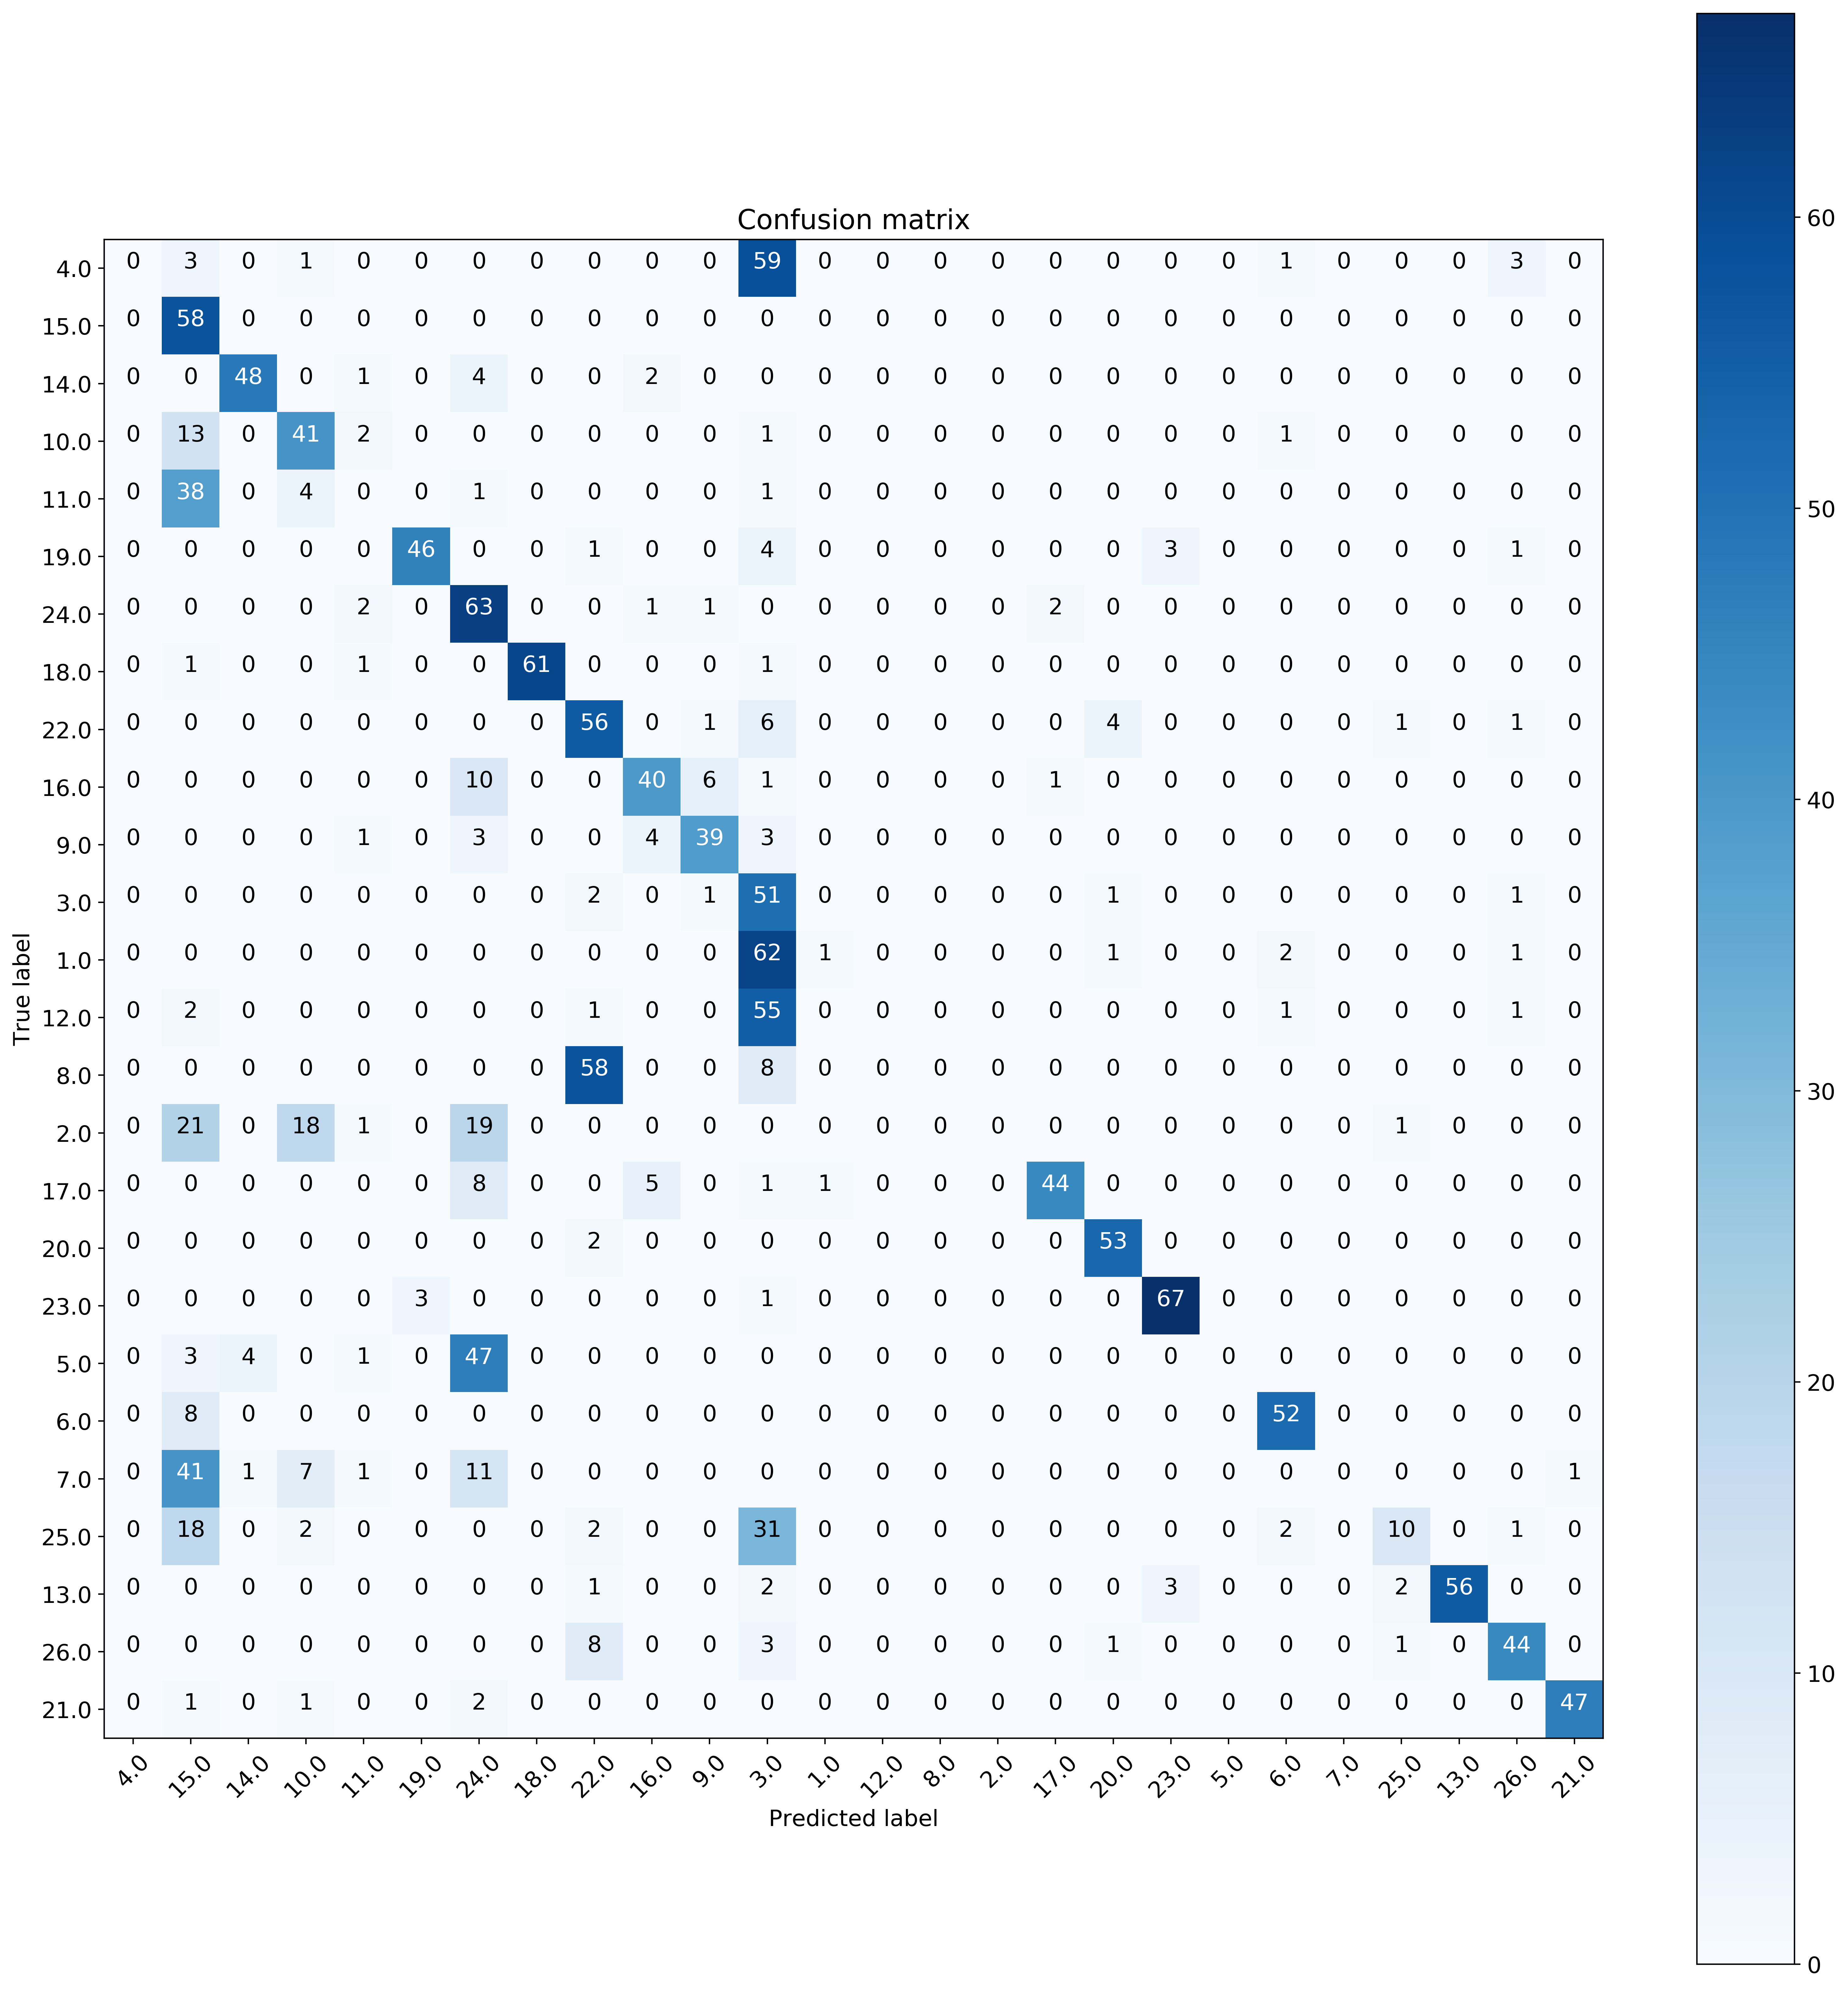

In [43]:
# FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# (With edits for prettier output)
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names = df2.label.unique()
plt.rcParams.update({'font.size': 13})

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

#    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(df2['label'], df2['predicted'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(num=None, figsize=(16,16), dpi=400, facecolor='w', edgecolor='k')
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()


## End